### Obtendo carga

In [1]:
import os

In [2]:
home_path = os.path.expanduser('~')

In [3]:
import pandas as pd

In [4]:
filenames = []
filesizes = []

In [5]:
for path, _, files in os.walk(home_path):
    for file in files:
        file_path = path + "/" + file
        
        try:
            file_size = os.stat(file_path).st_size / 1024
            filenames.append(file)
            filesizes.append(file_size)
        except:
            pass

In [6]:
df = pd.DataFrame({'Filename': filenames, 'Size': filesizes})

In [7]:
df.head(10)

,Filename,Size
0,20220929_175032.mp4,68963.072266
1,package.json,0.072266
2,.lesshst,0.062500
3,RUDP.zip,739.849609
4,computable-func.ppt,2677.000000
5,tofill,0.076172
6,Lucas Tassi Facciolla - Historico Escolar.pdf,17.346680
7,.Rhistory,16.353516
8,Dados_Teste_3.csv,1.161133
9,tictactoe.pl,0.098633


### Estatísticas descritivas


In [8]:
round(df.describe(percentiles=[0.01, 0.1, 0.9, 0.99]), 2)

,Size
count,493892.00
mean,177.50
std,21991.89
min,0.00
1%,0.00
10%,0.21
50%,3.30
90%,40.24
99%,812.36
max,11875328.00


Variância:

In [9]:
df.var(numeric_only=True)

Size    4.836433e+08
dtype: float64

Coeficiente de Variabilidade:

In [10]:
mean = df['Size'].mean()
std = df['Size'].std()
cv = std / mean
round(cv, 2)

123.9

### Gráficos

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Size', ylabel='Density'>

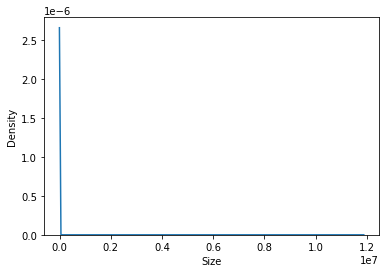

In [12]:
sns.kdeplot(df['Size'])

In [13]:
df_outliers = df.query('Size > 0 & Size < 50')

<AxesSubplot:xlabel='Size', ylabel='Density'>

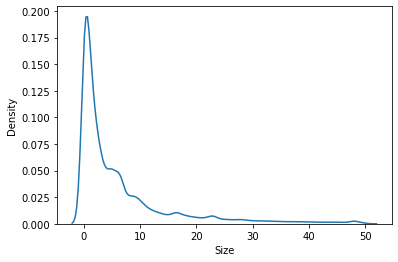

In [14]:
sns.kdeplot(df_outliers['Size'])

<AxesSubplot:xlabel='Size', ylabel='Density'>

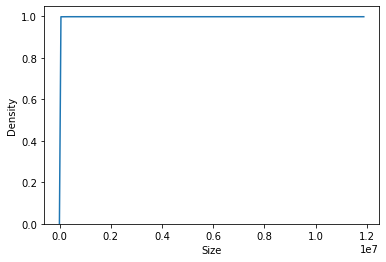

In [15]:
sns.kdeplot(df['Size'], cumulative=True)

<AxesSubplot:xlabel='Size', ylabel='Density'>

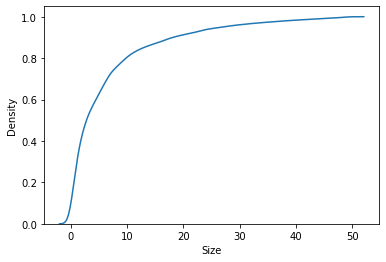

In [16]:
sns.kdeplot(df_outliers['Size'], cumulative=True)

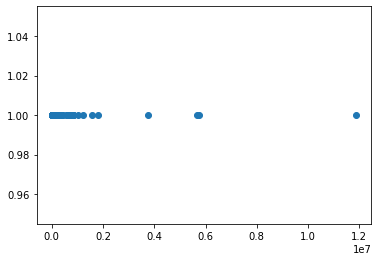

In [17]:
plt.plot(df['Size'], len(df['Size']) * [1], "o")

### Conclusões

* Estatisticas descritivas

    - Média de arquivos relativamente pequena, mas alguns arquivos grandes podem estar puxando pra cima.
    - Os percentis sugerem que grande parte (99%) dos arquivos são menores que 1 MB, ou seja, __arquivos grandes são raros de encontrar__.
    - A maior carga encontrada foi de 11875328 KB e a menor de 0.00 KB (arquivos vazios).
    - Variância, Desvio Padrão e CV altos sugerem alta dispersão do tamanho dos arquivos.
    
    
* Gráficos

    - PDF mostra que a maior quantidade de arquivos esta entre 0 e 8 KB, sugerindo __arquivos pequenos serem mais comuns__.
    - CDF mostra que 80% dos arquivos são menores que 10 KB, sugerindo também que __arquivos pequenos são mais comuns__.